# Evaluation

In [1]:
# Imports 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, PrecisionRecallDisplay
import os
import sys

sys.path.append(os.path.abspath("../scripts"))
from data_loader import DataLoader

import joblib
import pandas as pd

In [2]:
# Load data
data_loader = DataLoader()
X_train, y_train  = data_loader.training_data
X_val, y_val = data_loader.validation_data
X_test, y_test = data_loader.test_data

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (177576, 21)
y_train shape: (177576,)
X_val shape: (25875, 21)
y_val shape: (25875,)
X_test shape: (50229, 21)
y_test shape: (50229,)


In [3]:
# logistic regression
lr_model_filename = (
    "../models/logistic_regression/lg_model_cv_sampling_pca20241129_165533.pkl"
)
logistic_regression = joblib.load(lr_model_filename)

# naive bayes
naive_bayes_filename = (
    "../models/naive_bayes/nb_model_cv_f1_20241129_111525.pkl"
)
naive_bayes = joblib.load(naive_bayes_filename)

# support vector machine
svm_model_filename = "../models/support_vector_machine/svm_model__with-probability_full-data__20241127_155642.pkl"
svm = joblib.load(svm_model_filename)

# decision tree

# knn
knn_filename = "../models/knn/k=100_best_f1_postiv_20241128_204259.pkl"
knn = joblib.load(knn_filename)

# Nearest Centroid
nc_filename = "../models/nearest_centroid/best_20241127_201059.pkl"
nc = joblib.load(nc_filename)

# baselines
bl_model_filename = "../models/baseline/bl_model_majority20241126_120730.pkl"
bl_majority = joblib.load(bl_model_filename)

bl_model_strat_filename = "../models/baseline/bl_model_stratified20241126_122432.pkl"
bl_stratified = joblib.load(bl_model_strat_filename)


# all models
model_dict = {
    "Baseline Majority": bl_majority,
    "Baseline Stratified": bl_stratified,
    "Logistic Regression": logistic_regression,
    "Support Vector Machine": svm,
    "K-Nearest Neighbors": knn,
    "Nearest Centroid": nc,
    "Naive Bayes": naive_bayes
    # Add other models here
}

/Users/I549663/Library/CloudStorage/OneDrive-Personal/Dokumente/Studium/MMDS/Kurse/IE500_DataMining/Project/ie500_data_mining_project/venv/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.4.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


## Metrics

In [4]:
# Evaluate the model's performance on the test set
for model_name, model in model_dict.items():
    y_test = y_test
    X_test = X_test
    y_test_pred = model.predict(X_test)

    report = classification_report(y_test, y_test_pred, digits=4, zero_division=0)
    print(f"\n=== Model: {model_name} ===\n")
    print("Classification Report:\n", report)
    accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Accuracy: {accuracy:.4f}")
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
    specificity = tn / (tn + fp) # this is basically just the recall of the negative class
    print(f"Specificity: {specificity:.4f}") 
    cm = confusion_matrix(y_test, y_test_pred)
    print("\nConfusion Matrix:\n", cm)


=== Model: Baseline Majority ===

Classification Report:
               precision    recall  f1-score   support

         0.0     0.8424    1.0000    0.9145     42314
         1.0     0.0000    0.0000    0.0000      7915

    accuracy                         0.8424     50229
   macro avg     0.4212    0.5000    0.4572     50229
weighted avg     0.7097    0.8424    0.7704     50229

Accuracy: 0.8424
Specificity: 1.0000

Confusion Matrix:
 [[42314     0]
 [ 7915     0]]

=== Model: Baseline Stratified ===

Classification Report:
               precision    recall  f1-score   support

         0.0     0.8416    0.8447    0.8431     42314
         1.0     0.1531    0.1501    0.1516      7915

    accuracy                         0.7352     50229
   macro avg     0.4973    0.4974    0.4973     50229
weighted avg     0.7331    0.7352    0.7342     50229

Accuracy: 0.7352
Specificity: 0.8447

Confusion Matrix:
 [[35741  6573]
 [ 6727  1188]]

=== Model: Logistic Regression ===

Classificatio

In [5]:
metrics_df = pd.DataFrame(columns=[
    'Model', 
    'Accuracy', 
    'Overall_Precision', 
    'Overall_Recall', 
    'Overall_F1',
    'Precision_Negative',
    'Precision_Positive',
    'Specificity',
    'Recall_Negative', 
    'Recall_Positive', 
    'F1-Score_Negative', 
    'F1-Score_Positive', 
])

metrics_list = []  # Temporary list to store rows before creating the final DataFrame

for model_name, model in model_dict.items():
    y_test_pred = model.predict(X_test)
    report = classification_report(y_test, y_test_pred, digits=4, output_dict=True, zero_division=0)
    accuracy = accuracy_score(y_test, y_test_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
    specificity = tn / (tn + fp)  # Specificity calculation
    
    # Metrics for the negative class ('0.0')
    precision_negative = report['0.0']['precision']
    recall_negative = report['0.0']['recall']
    f1_score_negative = report['0.0']['f1-score']
    
    # Metrics for the positive class ('1.0')
    precision_positive = report['1.0']['precision']
    recall_positive = report['1.0']['recall']
    f1_score_positive = report['1.0']['f1-score']
    
    # Overall metrics (from 'weighted avg')
    overall_precision = report['weighted avg']['precision']
    overall_recall = report['weighted avg']['recall']
    overall_f1 = report['weighted avg']['f1-score']
    
    # Append metrics as a dictionary to the list
    metrics_list.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Overall_Precision': overall_precision,
        'Overall_Recall': overall_recall,
        'Overall_F1': overall_f1,
        'Precision_Negative': precision_negative,
        'Precision_Positive': precision_positive,
        'Specificity': specificity,
        'Recall_Negative': recall_negative,
        'Recall_Positive': recall_positive,
        'F1-Score_Negative': f1_score_negative,
        'F1-Score_Positive': f1_score_positive,

    })

# Convert the list of metrics into a DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Round all numeric values to 4 decimal places
metrics_df = metrics_df.round(4)

metrics_df

,Model,Accuracy,Overall_Precision,Overall_Recall,Overall_F1,Precision_Negative,Precision_Positive,Specificity,Recall_Negative,Recall_Positive,F1-Score_Negative,F1-Score_Positive
0,Baseline Majority,0.8424,0.7097,0.8424,0.7704,0.8424,0.0000,1.0000,1.0000,0.0000,0.9145,0.0000
1,Baseline Stratified,0.7350,0.7341,0.7350,0.7346,0.8422,0.1564,0.8435,0.8435,0.1551,0.8429,0.1558
2,Logistic Regression,0.7280,0.8480,0.7280,0.7624,0.9431,0.3395,0.7205,0.7205,0.7678,0.8170,0.4708
3,Support Vector Machine,0.5356,0.8412,0.5356,0.5905,0.9542,0.2372,0.4714,0.4714,0.8790,0.6310,0.3736
4,K-Nearest Neighbors,0.7433,0.8380,0.7433,0.7732,0.9303,0.3448,0.7516,0.7516,0.6988,0.8314,0.4617
5,Nearest Centroid,0.6902,0.8374,0.6902,0.7312,0.9370,0.3051,0.6779,0.6779,0.7562,0.7866,0.4348
6,Naive Bayes,0.7356,0.8417,0.7356,0.7677,0.9354,0.3411,0.7370,0.7370,0.7279,0.8244,0.4645


## Confusion Matrix Plot

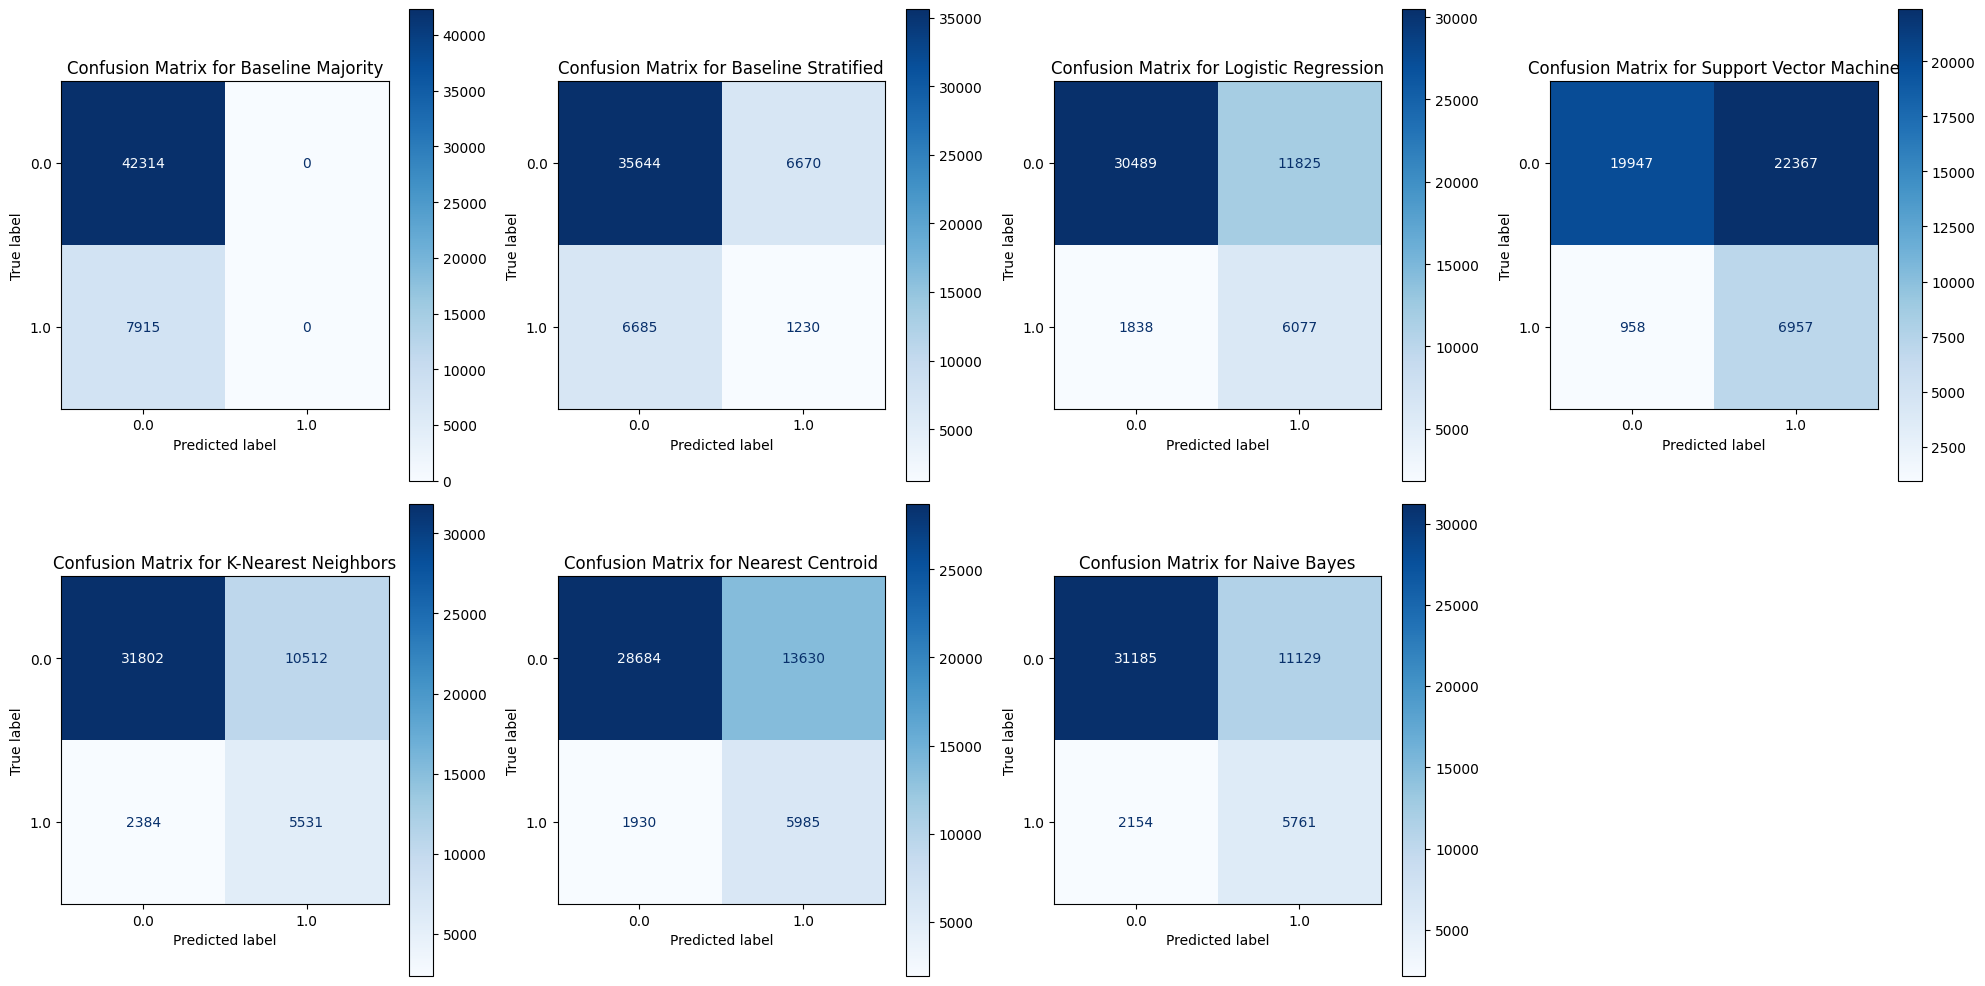

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Number of models to plot
n_models = len(model_dict)

# Determine grid size (e.g., 2x2 for 4 models, 3x2 for 6 models, etc.)
rows = int(n_models**0.5)
cols = (n_models + rows - 1) // rows  # Ceiling division

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))

# Flatten the axes array for easy indexing, in case it’s a multi-dimensional array
axes = axes.flatten()

for idx, (model_name, model) in enumerate(model_dict.items()):
    y_test_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_test_pred)
    
    # Plot confusion matrix on the corresponding subplot
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=axes[idx], cmap=plt.cm.Blues, values_format='d')
    axes[idx].set_title(f'Confusion Matrix for {model_name}')
    
# Hide any unused subplots
for ax in axes[len(model_dict):]:
    ax.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


## Precision Recall Curve

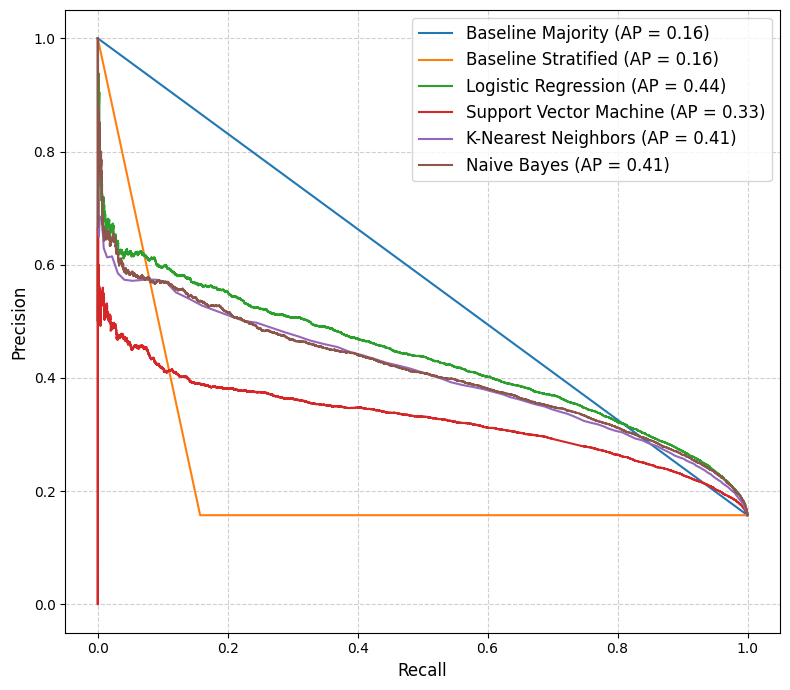

In [7]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Initialize a figure
plt.figure(figsize=(8, 7))

# Iterate over models and plot their Precision-Recall curves on the same plot
for model_name, model in model_dict.items():
    # Use predict_proba to get probabilities for the positive class
    if hasattr(model, "predict_proba"):
        y_test_proba = model.predict_proba(X_test)[:, 1]  # Use probabilities for the positive class
    else:
        # Fallback to decision_function if predict_proba is unavailable
        try:
            y_test_proba = model.decision_function(X_test)
        except:
            continue
    
    # Compute precision, recall, and average precision
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    avg_precision = average_precision_score(y_test, y_test_proba)
    
    # Plot the Precision-Recall curve with AP in the label
    plt.plot(recall, precision, label=f"{model_name} (AP = {avg_precision:.2f})")

# Add plot customizations
# plt.title("2-Class Precision-Recall Curve", fontsize=14)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.grid(alpha=0.6, linestyle='--')
plt.legend(fontsize=12)
plt.tight_layout()

# Display the combined plot
plt.show()

## ROC Curve

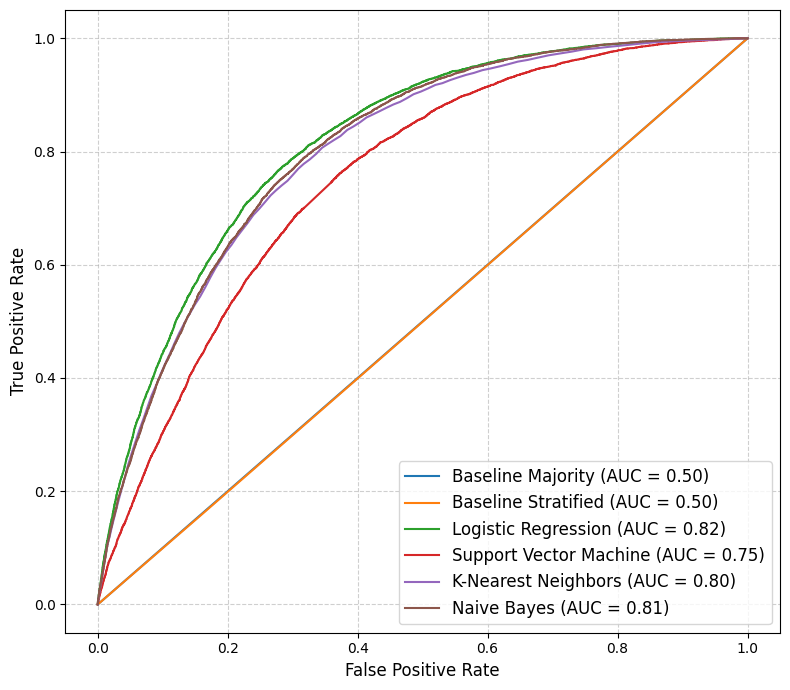

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialize a figure
plt.figure(figsize=(8, 7))

# Iterate over models and plot their ROC curves on the same plot
for model_name, model in model_dict.items():
    if hasattr(model, "predict_proba"):
        y_test_proba = model.predict_proba(X_test)[:, 1]  # Use probabilities for the positive class
    else:
        # Fallback to decision_function if predict_proba is unavailable
        try:
            y_test_proba = model.decision_function(X_test)
        except:
            continue
    
    # Compute false positive rate, true positive rate, and AUC
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = roc_auc_score(y_test, y_test_proba)
    
    # Plot the ROC curve with AUC in the label
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Add plot customizations
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.grid(alpha=0.6, linestyle='--')
plt.legend(fontsize=12)
plt.tight_layout()

# Display the combined plot
plt.show()